In [117]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [118]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [119]:
import numpy as np

X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [120]:
np.random.seed(42)

In [121]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [122]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [123]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [124]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [125]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [126]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sum = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sum

In [127]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [128]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        print(f"{iteration}\t\t{loss}")
    error = y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0		3.5356045081790177
500		0.3657128093566865
1000		0.2796767333861929
1500		0.23730682537151845
2000		0.2106341247925676
2500		0.1918855818710544
3000		0.17783427615558836
3500		0.1668423770769962
4000		0.1579716450124398
4500		0.15063928729878878
5000		0.14446158832065725


In [129]:
Theta

array([[ 7.46377573, -0.3766959 , -9.90580848],
       [-1.51883568,  0.91034578,  0.71317097],
       [-2.72755241, -0.80589525,  5.45019951]])

In [130]:
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
y_predict

array([1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 2, 0, 2, 1, 2, 1, 1], dtype=int64)

In [131]:
accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [132]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        l2_loss = 1 / 2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(f"{iteration}\t\t{loss}")
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0		4.074160805836161
500		0.5159746132958637
1000		0.49124622842160703
1500		0.4842826626269516
2000		0.48172881149189384
2500		0.4807092367289707
3000		0.4802846688736693
3500		0.48010354679755285
4000		0.4800251331504283
4500		0.4799908689215818
5000		0.4799758070182931


In [133]:
Theta

array([[ 5.00921933,  0.89931367, -4.04660468],
       [-1.11004694,  0.17634572,  0.93370122],
       [-0.43567091, -0.15021639,  0.5858873 ]])

In [134]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy = np.mean(y_predict == y_valid)
accuracy

0.9333333333333333

In [140]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
best_loss = np.infty
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1 / 2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 500 == 0:
        print(f"{iteration}\t\t{loss}")
    if loss < best_loss:
        best_loss = loss
    else:
        print(f"{iteration - 1}\t\t{best_loss}")
        print(f"{iteration}\t\t{best_loss}\t\tearly stopping!")
        break

0		1.204336764839757
500		0.5518927048488586
1000		0.5404719551645188
1500		0.5359753440631304
2000		0.5340230022214484
2500		0.5331339964090971
3000		0.532709088848445
3500		0.5324955657158198
4000		0.5323827635874211
4500		0.5323202615008813
5000		0.5322841094026691


In [141]:
Theta

array([[ 4.29595769,  0.18548175, -4.76953613],
       [-1.11070941,  0.17583612,  0.93487329],
       [-0.43582306, -0.1502945 ,  0.58611757]])

In [142]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy = np.mean(y_predict == y_valid)
accuracy

0.9333333333333333

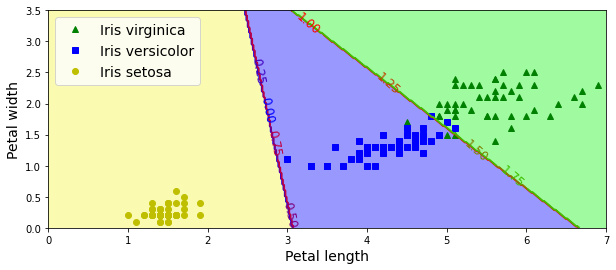

In [138]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1,fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [139]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667